In [0]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import pandas as pd
df=pd.read_csv("/content/sample_data/Final.csv")

In [0]:
import pandas as pd
from gensim.models import Phrases
from gensim import corpora, models
from nltk.tokenize import word_tokenize 
df=pd.read_csv("/content/sample_data/Final.csv")
tokens=[]
bigram = Phrases()
for a in df["cleaned_tweet"]:
  tokens.append(word_tokenize(a))
bigram = models.Phrases(tokens, min_count=30)
bigram_mod = models.phrases.Phraser(bigram)
# trigram =models.Phrases(bigram[tokens])  
# trigram_mod = models.phrases.Phraser(trigram)

In [0]:
#Top n-grams
import operator
dic={}
count=0
bigrams=[]
for id in range(len(tokens)):
    for token in bigram_mod[tokens[id]]:
        if '_' in token:
          bigrams.append(token)
          tokens[id].append(token)
for co in bigrams:
  if co in dic:
    dic[co]+=1
  else:
    dic[co]=1
bi= sorted(dic.items(),key=operator.itemgetter(1),reverse=True)


In [0]:
bi[:10]

[('test_posit', 16045),
 ('dure_pandem', 14673),
 ('stay_home', 10218),
 ('via_youtub', 9095),
 ('social_distanc', 8541),
 ('confirm_case', 7021),
 ('dure_crisi', 6959),
 ('public_health', 6193),
 ('new_york', 5972),
 ('stay_safe', 5353)]

In [0]:
len(tokens)

997924

In [0]:
# # Remove rare and common tokens.
# from gensim.corpora import Dictionary

# # Create a dictionary representation of the documents.
# dictionary = Dictionary(tokens)

# # Filter out words that occur less than 30 documents, or more than 50% of the documents.
# dictionary.filter_extremes(no_below=30, no_above=0.5)

In [0]:
#Dictionary Creation
dictionary = corpora.Dictionary(bigram_mod[tokens])
a=dictionary.filter_extremes(no_below=30, no_above=0.5)
#Creating Bag-of-words
corpus = [dictionary.doc2bow(text) for text in bigram_mod[tokens]]
print(corpus[:4])

# Bag-of-words representation of the documents.
# corpus = [dictionary.doc2bow(doc) for doc in tokens]

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1)], [(0, 2), (19, 1), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 3), (32, 2), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(0, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)]]


In [0]:
dictionary


In [0]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 21515
Number of documents: 997924


In [0]:
len(id2word)

438391

In [0]:
# Train LDA mode
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=2000,
                                           alpha='auto',
                                           eta='auto',
                                           iterations=400,
                                           passes=20,
                                           eval_every= None)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [0]:
len(corpus)

997924

In [0]:
from pprint import pprint
pprint(lda_model.print_topics())
#To print the % of topics a document is
doc_lda = lda_model[corpus]

[(0,
  '0.061*"case" + 0.058*"death" + 0.058*"new" + 0.030*"report" + 0.027*"state" '
  '+ 0.025*"number" + 0.014*"china" + 0.013*"confirm_case" + 0.013*"million" + '
  '0.012*"posit"'),
 (1,
  '0.044*"sign_petit" + 0.043*"via_chang" + 0.031*"via_youtub" + '
  '0.029*"south_africa" + 0.019*"discus" + 0.012*"california" + '
  '0.008*"amid_pandem" + 0.008*"sale" + 0.007*"new_zealand" + 0.007*"podcast"'),
 (2,
  '0.022*"coronaviru" + 0.021*"help" + 0.020*"dure" + 0.020*"pandem" + '
  '0.019*"amp" + 0.013*"may" + 0.012*"support" + 0.012*"due" + 0.011*"use" + '
  '0.011*"respons"'),
 (3,
  '0.022*"australia" + 0.014*"video" + 0.012*"sa" + 0.010*"uk" + '
  '0.010*"front_line" + 0.009*"claim" + 0.009*"medium" + 0.009*"go_back" + '
  '0.009*"nurs" + 0.008*"ever"'),
 (4,
  '0.039*"wa" + 0.038*"test" + 0.026*"die" + 0.020*"viru" + 0.020*"trump" + '
  '0.016*"price_dure" + 0.015*"first" + 0.015*"infect" + 0.012*"vaccin" + '
  '0.011*"caus"'),
 (5,
  '0.036*"test_posit" + 0.023*"april" + 0.022*"ci

**LDA Visualization**

In [0]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.068054  0.445728       1        1  30.709856
2     -0.312109 -0.011300       2        1  21.461990
4      0.087915 -0.128212       3        1  10.360909
0     -0.310542  0.002199       4        1   7.721224
3      0.086693 -0.078884       5        1   5.848535
8      0.086098 -0.061322       6        1   5.810054
5      0.037112 -0.093762       7        1   5.249489
9      0.086424  0.028501       8        1   4.688625
1      0.085592 -0.054170       9        1   4.456320
7      0.084763 -0.048778      10        1   3.692985, topic_info=           Term           Freq          Total Category  logprob  loglift
19          thi  164851.000000  164851.000000  Default  30.0000  30.0000
40         case   61561.000000   61561.000000  Default  29.0000  29.0000
41        death   59502.000000   59502.000000  Default  28.0000  28.0000
44          new   59026.000000   59026.000000  Default  27.0000  27.0000
26           ha  101011.000000  101011.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
3038    opinion    2759.628418    2759.752686  Topic10  -5.1723   3.2987
1748  highlight    2729.883057    2730.007324  Topic10  -5.1831   3.2987
4194    absolut    2605.978027    2606.102295  Topic10  -5.2296   3.2987
43         five    2585.277100    2585.401367  Topic10  -5.2376   3.2987
4261      estim    2440.835693    2440.959717  Topic10  -5.2950   3.2987

[334 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4194     10  0.999961    absolut
1736      6  1.000030     accord
551       3  0.999981     actual
889       8  0.999889      adapt
2212     10  1.000007     africa
...     ...       ...        ...
276       1  1.000007       work
550       2  0.999972     worker
157       1  0.999992      world
257       1  0.999994      would
1325      4  0.999983  yesterday

[304 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 1, 4, 9, 6, 10, 2, 8])

In [41]:
lda_corpus = lda_model[corpus]
ids=[]
for i in lda_model.get_document_topics(corpus):
  ids.append(i)
dup=ids
import operator
for a in dup:
  sortedd=a.sort(key = operator.itemgetter(1), reverse = True)
final_list=[]
for a in dup:
  final_list.append(a[0])
topics=[]
topic_per=[]
for a,b in final_list:
  topics.append(a)
  topic_per.append(b)
df4=pd.DataFrame(list(zip(topics,topic_per)), 
               columns =['Topic', 'Topic_per']) 
df_final=df[["Country","date"]]
df_final=pd.concat([df_final,df4],axis=1)
df_final

,Country,date,Topic,Topic_per
0,Canada,2020-04-08 23:20:03+00:00,6,0.251252
1,Canada,2020-04-08 23:04:56+00:00,6,0.366819
2,Canada,2020-04-08 22:43:32+00:00,6,0.470495
3,Canada,2020-04-08 22:21:03+00:00,6,0.251252
4,Canada,2020-04-08 22:15:26+00:00,2,0.314013
...,...,...,...,...
997919,Australia,2020-04-23 01:35:55+00:00,6,0.349768
997920,Australia,2020-04-23 00:49:27+00:00,2,0.228646
997921,Australia,2020-04-23 00:37:27+00:00,6,0.323065
997922,Australia,2020-04-23 00:35:10+00:00,2,0.314013


[Text(0, 0, 'Topic0'),
 Text(0, 0, 'Topic1'),
 Text(0, 0, 'Topic2'),
 Text(0, 0, 'Topic3'),
 Text(0, 0, 'Topic4'),
 Text(0, 0, 'Topic5'),
 Text(0, 0, 'Topic6'),
 Text(0, 0, 'Topic7'),
 Text(0, 0, 'Topic8')]

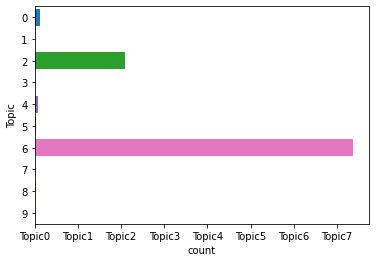

In [49]:
ax = sns.countplot(y="Topic",data=us,saturation=1)
ax.set_xticklabels(["Topic0","Topic1","Topic2","Topic3","Topic4","Topic5","Topic6","Topic7","Topic8","Topic9"])

In [0]:
fg=df_final[df_final["Country"]=="China"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'Topic0'),
 Text(0, 0, 'Topic1'),
 Text(0, 0, 'Topic2'),
 Text(0, 0, 'Topic3'),
 Text(0, 0, 'Topic4'),
 Text(0, 0, 'Topic5'),
 Text(0, 0, 'Topic6'),
 Text(0, 0, 'Topic7'),
 Text(0, 0, 'Topic8'),
 Text(0, 0, 'Topic9')]

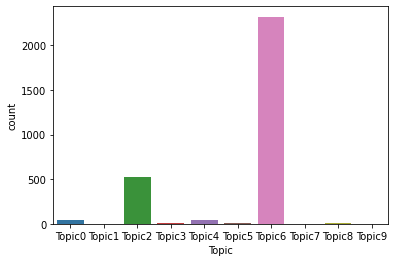

In [30]:
import seaborn as sns
ax = sns.countplot(x="Topic", data=fg)
ax.set_xticklabels(["Topic0","Topic1","Topic2","Topic3","Topic4","Topic5","Topic6","Topic7","Topic8","Topic9"])

[Text(0, 0, 'Topic0'),
 Text(0, 0, 'Topic1'),
 Text(0, 0, 'Topic2'),
 Text(0, 0, 'Topic3'),
 Text(0, 0, 'Topic4'),
 Text(0, 0, 'Topic5'),
 Text(0, 0, 'Topic6'),
 Text(0, 0, 'Topic7'),
 Text(0, 0, 'Topic8'),
 Text(0, 0, 'Topic9')]

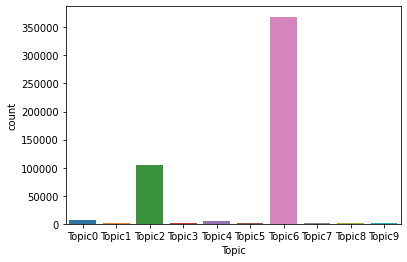

In [33]:
us=df_final[df_final["Country"]=="United States"]
ax = sns.countplot(x="Topic", data=us)
ax.set_xticklabels(["Topic0","Topic1","Topic2","Topic3","Topic4","Topic5","Topic6","Topic7","Topic8","Topic9"])